# Codificação de dados

Nesta página, apresentaremos o problema de codificação de dados para aprendizado de máquina quântico e, em seguida, descreveremos e implementaremos vários métodos de codificação de dados. 

## Introdução

A representação de dados é crucial para o sucesso dos modelos de aprendizado de máquina. Para o aprendizado de máquina clássico, o problema é como representar os dados numericamente, para que possam ser melhor processados por um algoritmo de aprendizado de máquina clássico.

Para o aprendizado de máquina quântico, essa questão é semelhante, mas mais fundamental: como representar e inserir eficientemente os dados em um sistema quântico, para que possam ser processados por um algoritmo de aprendizado de máquina quântico. Isso geralmente é chamado de *codificação* de dados, mas também é chamado de *incorporação* ou *carregamento* de dados.

Esse processo é uma parte crucial dos algoritmos de aprendizado de máquina quânticos e afeta diretamente seu poder computacional. 

## Métodos

Vamos considerar um conjunto de dados clássico $\mathscr{X}$ consistindo de $M$ amostras, cada uma com $N$ [características](gloss:features) : $$\class{script-x}{\mathscr{X}} = \class{brace}{{ }x^{(1)},\class{ellipsis}{\dots},\cssId{_x-lil-m}{x^{(m)}},\dots,x^{(M)}\class {brace}{}}$$ onde $x^{(m)}$ é um vetor $N$ dimensional para $m = 1, ..., M$. Para representar este conjunto de dados em um sistema de qubits, podemos usar várias técnicas de incorporação, algumas das quais são brevemente explicadas e implementadas a seguir, conforme as  Referências [1](#References) e [2](#References) .

### Codificação de base

A codificação de base associa uma string clássica de $N$ bits com um [estado de base computacional](gloss:computational-basis-state) de um sistema de $N$ qubits. Por exemplo, se $x = 5$, isso pode ser representado como uma string de $4$ bist como $0101$, e por um sistema $4$ qubits como o estado quântico $|0101\rangle$. De forma geral, para uma string de $N$ bits: $x = (b_1, b_2, ... , b_N)$, o estado de $N$ qubits correspondente é $\cssId{ket-x}{| x \rangle} = | b_1, b_2, ... , b_N \rangle$ com $b_n \class{in}{\in} {0,1}$ para $n = 1 , \dots , N$.

Para o conjunto de dados clássico $\mathscr{X}$ descrito acima, para usar a codificação de base, cada ponto de dados deve ser uma string de $N$ bits: $x^{(m)} = (b_1, b_2, ... , b_N )$, que pode ser mapeado diretamente para o estado quântico $|x^{m}\rangle = |b_1, b_2, ... , b_N \rangle$ com $b_n \in {0, 1 } $ para $n = 1, ..., N$ e $m = 1, ..., M$. Podemos representar todo o conjunto de dados como superposições de estados de base computacional:

$$\cssId{_ket-dataset}{| \mathscr{X} \rangle} = \frac{1}{\sqrt{\cssId{_m}{M}}}\cssId{*sum-m}{\sum*{m=1}^{M}|x^{m} \rangle} $$

<!-- ::: q-block -->

### Codificação de base

```
q-statevector-binary-encoding
  p Add/remove bit strings to/from our input dataset on the left to see how basis encoding encodes this in the state vector on the right.
```

<!-- ::: -->

No Qiskit, uma vez que calculamos qual estado irá codificar nosso conjunto de dados, podemos usar a função `initialize` para prepará-lo. Por exemplo, o conjunto de dados $\mathscr{X} = {x^{(1)}=101, x^{(2)}=111}$ é codificado como o estado $|\mathscr{X}\rangle= \ frac{1}{\sqrt{2}}(|101\rangle+|111\rangle)$:

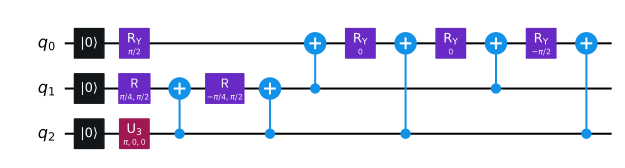

In [1]:
import math
from qiskit import QuantumCircuit

desired_state = [
    0,
    0,
    0,
    0,
    0,
    1 / math.sqrt(2),
    0,
    1 / math.sqrt(2)]

qc = QuantumCircuit(3)
qc.initialize(desired_state, [0,1,2])

qc.decompose().decompose().decompose().decompose().decompose().draw()

Este exemplo ilustra algumas desvantagens da codificação de base. Embora seja simples de entender, os vetores de estado podem se tornar bastante esparsos e os esquemas para implementá-lo geralmente não são eficientes. 

### Codificação de amplitude

A codificação de amplitude codifica dados nas amplitudes de um estado quântico. Ela representa um ponto de dados $N$-dimensional clássico normalizado, $x$, como as amplitudes de um estado quântico de $n$ qubits, $|\psi_x\rangle$: $$|\psi_x\rangle = \sum_{i= 1}^N x_i |i\rangle$$ onde $N = 2^n$, $x_i$ é o elemento $i^{th}$ de $x$ e $|i\rangle$ é o $i^{ th}$ estado da base computacional.

Para codificar o conjunto de dados clássico $\mathscr{X}$ descrito acima, concatenamos todos os pontos de dados $M$ $N$-dimensionais em um vetor de amplitude, de comprimento $N \times M$: $$\alpha=\cssId{ *a -norm}{A* {\text{norm}}}(x_{1}^{(1)},...,x_{N}^{(1)},...,x_{1}^{ (m)},...,x_{N}^{(m)},...,x_{1}^{(M)},...,x_{N}^{(M)}) $$ onde $A_{\text{norm}}$ é uma constante de normalização, tal que $|\alpha|^2 = 1$. O conjunto de dados $\mathscr{X}$ agora pode ser representado na base computacional como: $$|\mathscr{X}\rangle = \sum_{i=1}^N \alpha_i |i\rangle$$ onde $\ alpha_i$ são elementos do vetor de amplitudes e $|i\rangle$ são os estados da base computacional. O número de amplitudes a serem codificadas é $N \times M$. Como um sistema de $n$ qubits fornece $2^n$ amplitudes, a incorporação de amplitude requer $n \ge \mathrm{log}_2(NM)$ qubits.

<!-- ::: q-block -->

### Codificação de amplitude

```
q-statevector-amplitude-encoding
  p Change the values of the datapoints on the left, and see how amplitude encoding encodes these as a state vector on the right.
```

<!-- ::: -->

Como exemplo, vamos codificar o conjunto de dados $\mathscr{X}= {x^{(1)}=(1.5,0), x^{(2)}=(-2,3)}$ usando codificação de amplitude. Concatenando os dois pontos de dados e normalizando o vetor resultante, obtemos: $$\alpha = \frac{1}{\sqrt{15.25}}(1.5,0,-2,3)$$ e o estado quântico de 2 qubits resultante seria: $$|\mathscr{X}\rangle = \frac{1}{\sqrt{15.25}}(1.5|00\rangle-2|10\rangle+3|11\rangle)$$

No exemplo acima, o número total de elementos do vetor amplitude, $N \times M$, é uma potência de 2. Quando $N \times M$ não é uma potência de 2, podemos simplesmente escolher um valor para $ n$ tal que $2^n\geq MN$ e preencher o vetor amplitude com constantes pouco informativas.

Tal como na codificação de base, uma vez calculado qual o estado que codifica nosso conjunto de dados, podemos usar a função `initialize` no Qiskit para prepará-lo:

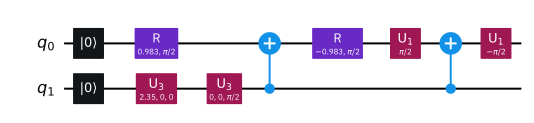

In [7]:
desired_state = [
    1 / math.sqrt(15.25) * 1.5,
    0,
    1 / math.sqrt(15.25) * -2,
    1 / math.sqrt(15.25) * 3]

qc = QuantumCircuit(2)
qc.initialize(desired_state, [0,1])

qc.decompose().decompose().decompose().decompose().decompose().draw()

A vantagem da codificação de amplitude é que ela requer apenas $\mathrm{log}_2(NM)$ qubits para codificar. No entanto, algoritmos subsequentes devem operar nas amplitudes de um estado quântico, e os métodos para preparar e medir os estados quânticos tendem a não ser eficientes. 

### Codificação de ângulo

A codificação de ângulo codifica $N$ recursos nos ângulos de rotação de $n$ qubits, onde $N \le n$. Por exemplo, o ponto de dados $x = (x_1,...,x_N)$ pode ser codificado como: $$\cssId{_}{|x\rangle} = \class{ *big-o-times-n}{\ bigotimes^N* {i=1}} \cos(x_i)|0\rangle + \sin(x_i)|1\rangle$$

Isso é diferente dos dois métodos de codificação anteriores, pois codifica apenas um ponto de dados por vez, em vez de um conjunto de dados inteiro. No entanto, ele usa apenas $ N $ qubits e um circuito quântico de profundidade constante, tornando-o receptivo ao hardware quântico atual.

Podemos especificar a codificação de ângulo como uma [unitária](gloss:unitary) : $$ S_{x_j} = \class{ *big-o-times-n}{\bigotimes* {i=1}^N} U(x_j^{(i)}) $$

onde:

$$ U(x_j^{(i)}) = \begin{bmatrix} \cos(x_j^{(i)}) &amp; -\sin(x_j^{(i)}) \ \sin(x_j^{(i)}) &amp; \cos(x_j^{(i)}) \ \end{bmatrix} $$

Lembrando que uma rotação de um único qubit em torno do eixo $Y$ é: $$RY(\theta) = \exp(-i \frac{\theta}{2} Y) = \begin{pmatrix} \cos{\ frac{\theta}{2}} &amp; -\sin{\frac{\theta}{2}} \ \sin{\frac{\theta}{2}} &amp; \cos{\frac{\theta}{2 }} \end{pmatrix} $$

Notamos que $U(x_j^{(i)}) = RY(2x_j^{(i)})$, e como exemplo, codificamos o ponto de dados $x = (0, \pi/4, \pi/2 )$ usando o qiskit:

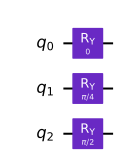

In [8]:
qc = QuantumCircuit(3)

qc.ry(0, 0)
qc.ry(math.pi/4, 1)
qc.ry(math.pi/2, 2)
qc.draw()

A codificação de ângulo denso é uma ligeira generalização da codificação de ângulo, que codifica dois recursos por qubit usando a fase relativa, onde o ponto de dados $x = (x_1,...,x_N)$ pode ser codificado como: $$|x\rangle = \class{ *big-o-times-n2}{\bigotimes* {i=1}^{N/2}} \cos(x_{2i-1})|0\rangle + e^{i x_{2i}} \sin(x_{2i-1})|1\rangle$$

Embora a codificação de ângulo e ângulo denso usem sinusóides e exponenciais, não há nada de especial sobre essas funções, e podemos facilmente abstraí-las para uma classe geral de codificações de qubit que usam funções arbitrárias ou definem as codificações como unidades arbitrárias, implementadas como circuitos quânticos parametrizados

### Codificação arbitrária

A codificação arbitrária codifica $N$ recursos como rotações em $N$ portas lógicas parametrizadas em $n$ qubits, onde $n \leq N$. Tal como a codificação de ângulo, esta codifica apenas um ponto de dados de cada vez, em vez de um conjunto de dados inteiro. Esta codificação também usa um circuito quântico de profundidade constante e $n \leq N$ qubits, o que significa que pode ser executada no hardware quântico atual. 

Por exemplo, usar o circuito do Qiskit [`EfficientSU2`](https://qiskit.org/documentation/stubs/qiskit.circuit.library.EfficientSU2.html) para codificar 12 recursos, necessita apenas de 3 qubits:

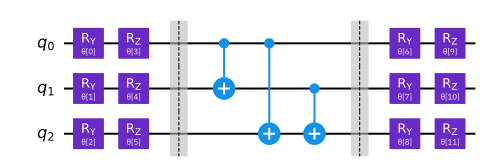

In [4]:
from qiskit.circuit.library import EfficientSU2

circuit = EfficientSU2(num_qubits=3, reps=1, insert_barriers=True)
circuit.decompose().draw()

Aqui codificamos o ponto de dados $x = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2]$ com 12 recursos, usando cada uma das portas parametrizadas para codificar uma recurso diferente.

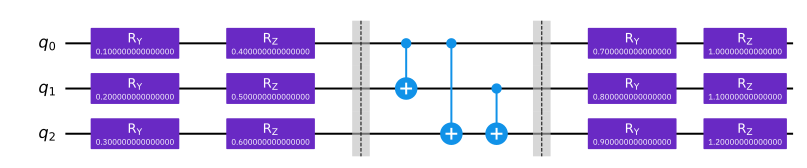

In [5]:
x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2]

encode = circuit.bind_parameters(x)
encode.decompose().draw()

O circuito Qiskit [`ZZFeatureMap`](https://qiskit.org/documentation/stubs/qiskit.circuit.library.ZZFeatureMap.html) com 3 qubits, codifica apenas um ponto de dados de 3 recursos, apesar de possuir 6 portas parametrizadas:

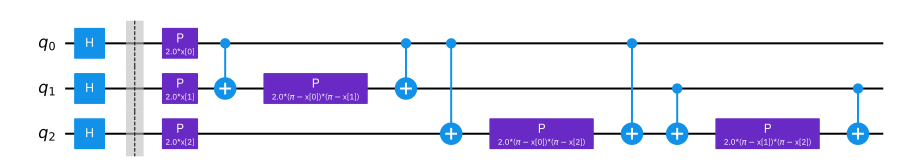

In [6]:
from qiskit.circuit.library import ZZFeatureMap

circuit = ZZFeatureMap(3, reps=1, insert_barriers=True)
circuit.decompose().draw()

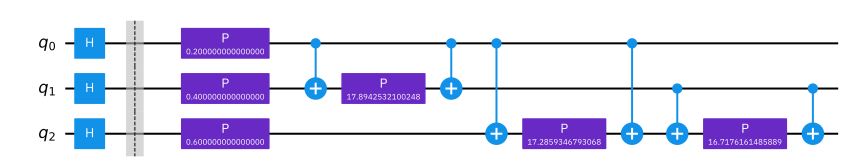

In [7]:
x = [0.1, 0.2, 0.3]

encode = circuit.bind_parameters(x)
encode.decompose().draw()

<!-- ::: q-block.exercise -->

### Questionário rápido

<!-- ::: q-quiz(goal="qml-encoding-0") -->

<!-- ::: .question -->

Um circuito quântico parametrizado possui 16 parâmetros. Qual é o maior número de recursos que ele pode codificar?

<!-- ::: -->

<!-- ::: .option -->

1. 4

<!-- ::: -->

<!-- ::: .option -->

1. 8

<!-- ::: -->

<!-- ::: .option(correct) -->

1. 16

<!-- ::: -->

<!-- ::: .option -->

1. 32

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

O desempenho de diferentes circuitos quânticos parametrizados em diferentes tipos de dados é uma área ativa de investigação.

<div style="display: none"> $$\cssId{big-o-times}{\bigotimes}$$</div>

## Referências

1. Maria Schuld and Francesco Petruccione, *Supervised Learning with Quantum Computers*, Springer 2018, [doi:10.1007/978-3-319-96424-9](https://www.springer.com/gp/book/9783319964232).
2. Ryan LaRose and Brian Coyle, *Robust data encodings for quantum classifiers*, Physical Review A 102, 032420 (2020), [doi:10.1103/PhysRevA.102.032420](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.102.032420), [arXiv:2003.01695](https://arxiv.org/abs/2003.01695).

In [8]:
import qiskit.tools.jupyter
%qiskit_version_table

/usr/local/anaconda3/lib/python3.7/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
